# Lambda School Data Science - Intro to Statistics

![Three hunters](https://i.imgur.com/hxKELZy.jpg)

> Three statisticians go hunting, and they see a duck. The first statisician shoots and misses to the right, and the second shoots and misses to the left. The third shouts "We got it!"

Statistics is the mathematics of organizing, analyzing, and interpreting data - it's the foundation of much of what we do as data scientists. It is a "pure" abstract math topic, but can be applied to real-world situations where there is error and uncertainty.

The main reason we need statistics is because it is generally not possible to collect *all* the data ever for a problem. Doing that is called a census (what the US tries to do every 10 years), and is generally expensive and unrealistic (especially if data changes over time). Instead for most problems we have data about a subset of it - a *sample* - and then we use statistics to say things about the broader *population* (all data) that it represents.

There are two types of methods in statistics - *descriptive* and *inferential*. Descriptive means summarizing data, often with measures such as the mean, median, and mode. Inferential means identifying patterns in your sample data and making predictions about the broader population.

For today we'll be starting with descriptive statistics - inference is clearly cool, but a lot of good work can be done by starting simple and only making things more complicated as necessary.

# Random Variables

In most math, a variable is a symbol to specify an arbitrary, but still in some sense unchanging and unique, value. Consider:

$
x = 2 \\
y = 3 * x
$

What is $y$? We can solve for it, plugging in the given value for $x$. These are variables, but they're not *random* - they have unique values that can be definitively calculated.

A **random variable** in statistics is usually written $X$ and is a variable that ranges over possible values that are the outcomes of some random process/phenomenon. For instance, consider rolling a six-sided die:

![Dice](https://upload.wikimedia.org/wikipedia/commons/4/4c/Dice.png)

Assuming it is "fair", there are six possible outcomes, the numbers `[1, 2, 3, 4, 5, 6]`, each equally likely. We could write this out as:

$P(X=x) = 1/6$ for $x \in [1, 2, 3, 4, 5, 6]$

∈ (mathematics) means that it is an element in the set of

But we're data scientists - so let's write some code!

## Discrete

The first sort of random variable we'll look at is discrete - these take values from an enumerated set, like the dice example above. The main rule for a discrete random variable is that the sum of all the probabilities (across all the discrete options) has to be exactly 1.

Let's reproduce a six-sided die in Python, with the handy `random` from the standard library:

In [2]:
import random
dir(random)  # Let's see what we've got

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [3]:
# Lots of stuff! "randint" sounds promising, integers are discrete
help(random.sample)

Help on method sample in module random:

sample(population, k) method of random.Random instance
    Chooses k unique random elements from a population sequence or set.
    
    Returns a new list containing elements from the population while
    leaving the original population unchanged.  The resulting list is
    in selection order so that all sub-slices will also be valid random
    samples.  This allows raffle winners (the sample) to be partitioned
    into grand prize and second place winners (the subslices).
    
    Members of the population need not be hashable or unique.  If the
    population contains repeats, then each occurrence is a possible
    selection in the sample.
    
    To choose a sample in a range of integers, use range as an argument.
    This is especially fast and space efficient for sampling from a
    large population:   sample(range(10000000), 60)



In [4]:
# Looking good - let's give it a try
die_roll_1 = random.randint(1, 6)
print(die_roll_1)

3


In [5]:
# Let's do a bunch of rolls and save them in a list
die_rolls = [random.randint(1, 6) for _ in range(101)]
print(die_rolls)

[4, 2, 1, 6, 3, 4, 1, 2, 5, 4, 1, 1, 2, 2, 2, 4, 4, 3, 2, 1, 2, 1, 2, 3, 5, 2, 6, 1, 6, 2, 1, 3, 5, 2, 5, 6, 2, 5, 4, 1, 1, 5, 6, 3, 6, 3, 2, 5, 6, 6, 4, 5, 3, 2, 3, 1, 1, 5, 2, 6, 6, 2, 1, 1, 2, 3, 2, 5, 6, 5, 5, 1, 4, 2, 2, 4, 5, 1, 5, 3, 1, 1, 3, 1, 3, 5, 6, 4, 4, 2, 4, 5, 6, 1, 3, 4, 1, 4, 1, 2, 3]


In [6]:
# What can we say about these? Well, we can figure out the mean
sum(die_rolls) / len(die_rolls)

3.1881188118811883

In [7]:
# And we can figure out the median
sorted(die_rolls)[len(die_rolls) // 2]

3

In [0]:
# For your assignment - the mode!
# But intuitively - what would we expect it to be in this case?
# How would it behave if we reran all our code?

## Continuous

Another sort of random variable is continuous - these can take any real value in an interval (or sometimes any real value whatsoever, i.e. from $(-\infty, \infty)$).

![Attention!](https://upload.wikimedia.org/wikipedia/commons/d/d9/Attention_yellow.png)

**Important - about intervals** - to understand continuous distributions you need to be able to read mathematical intervals. These are *different* from Python lists/tuples/sets, even though they're values separated by commas.

In general, square brackets $[ ]$ mean "closed" intervals, which include the endpoints, and parentheses $( )$ mean "open" intervals and exclude endpoints.

*   $[a, b]$ means all (real) numbers from $a$ to $b$, including both $a$ and $b$
*   $[a, b)$ means all (real) numbers from $a$ to $b$, including $a$ but *not* $b$
*  $(a, b]$ means all (real) numbers from $a$ to $b$, including $b$ but *not* $a$
*  $(a, b)$ means all (real) numbers from $a$ to $b$, but excluding both $a$ and $b$




In [9]:
# So, what continuous distributions do we have in Python?
help(random.random)

Help on built-in function random:

random(...) method of random.Random instance
    random() -> x in the interval [0, 1).



In [10]:
# Short documentation, but there's a mathy interval
# That's our clue that this is a continuous real distribution
random.random()

0.3439525999432044

In [11]:
# And as with random.randint, we can make a list with repeated calls
random_draws = [random.random() for _ in range(100)]
print(random_draws)

[0.7340751810506596, 0.06904663329353777, 0.7756590351500079, 0.790228332890493, 0.1938985170595262, 0.44339642351371866, 0.33653502167137817, 0.5176217149674099, 0.9133367492781077, 0.2237971301623798, 0.40278959261836955, 0.21052951016985544, 0.7722596590982409, 0.8067952194784436, 0.2822003027797332, 0.8965462670959374, 0.7095352285149175, 0.3182333934011613, 0.9122110211735145, 0.9051579524550528, 0.15987380913872207, 0.809938185289979, 0.5915273892957595, 0.23965757694531908, 0.5574864919613668, 0.7059654373843012, 0.519353354235222, 0.8737667599805181, 0.9918371136364683, 0.9798942156936028, 0.4888580815864254, 0.167904588250523, 0.3262797696175568, 0.8598031018337648, 0.7642908058489379, 0.5645888248251939, 0.8795077138257862, 0.3808999743481498, 0.47145084768810697, 0.7572273368800118, 0.7844548957716904, 0.38528230274455244, 0.9440507840346684, 0.8409783211911799, 0.7755536701855678, 0.11003402051218214, 0.9790344739228295, 0.9719590325454232, 0.3116560833693207, 0.26297655866

In [12]:
# And use extremely similar code to calculate the mean
sum(random_draws) / len(random_draws)

0.5375512454796864

In [13]:
# And the median
sorted(random_draws)[len(random_draws) // 2]

0.519353354235222

In [0]:
# Does it make sense to ask about the mode?
# Not really - real numbers are "soupy", which means each draw is unique

# But one thing that does make sense - we're reusing similar code
# That sounds like a job for a function - let's write one!
def mean(numbers):
  return sum(numbers) / len(numbers)

As with discrete random variables, continuous random variables sum to 1 - but because they are continuous it's not regular addition but actually *integration*:

![Calculus!](http://www.thebluediamondgallery.com/handwriting/images/calculus.jpg)

Don't worry, we don't have to work through the details at this time - but there are many excellent calculus resources out there (Khan Academy, MIT OCW, etc.), and at some point in your data career it's good to at least take a look at them.

# Distributions

A random variable can describe any observable process, but a lot of real data has similar shape and patterns. We call these common patterns of random variables **distributions**.

There's a lot of distributions (look back at `dir(random)` above), but we're going to just talk about two of the most important - *uniform* and *normal*.

## Uniform distribution

Guess what? You've already seen this! A (fair) die provides a uniform distribution across its outcomes. All this means is that all the outcomes are *equally likely*, or "equiprobable."

The uniform distribution is somewhat special because it can be both discrete (die-roll) and continuous (interval). `random.random()` that we used above is an example of a continuous uniform distribution.

What real-world data is uniform (besides dice and random number generators)?

- A raffle for a TV sells 500 tickets to 500 different people, and then draws one at random to pick a winner. This is an example of a discrete random uniform distribution (essentially like rolling a really large die).
- You are at a bus stop where the bus comes by once per hour, but you do not know when it last came through. The time you have to wait is a (continuous) uniform random distribution over $[0, 1]$ hours.
- 317 baseball players are all ranked based on their ability, from 1 (the best) to 317 (the worst). One is then selected at random - the rank corresponding to whoever was selected is distributed according to a discrete random uniform distribution over `[1, 2, 3, ..., 315, 316, 317]`.

In [15]:
# Exercise! Let's write code to express the above examples
raffle_draw = random.randint(1, 500)
print(raffle_draw)

479


## Normal distribution

![Several normal distributions](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg)

You've probably heard of "bell curves" - this is the distribution that is referring to. One other name for them is "Gaussian", as the function that defines them was discovered by Carl Friedrich Gauss:

![Normal distribution probability distribution function](https://wikimedia.org/api/rest_v1/media/math/render/svg/8aa9ff808602c27f1d9d63d7b2c115388a34f190)

That's a rather thorny piece of math - but you can get a better intuition for the importance of the normal distribution without diving into it. The hint is in the name - "normal."

In [0]:
# Let's go back to our friend, the die

# We can define a function that takes a number for die size and another
# for how many times to roll it, and returns a list of those rolls

def roll_dice(sides=6, rolls=100):
  return [random.randint(1, sides) for _ in range(rolls)]

In [17]:
# Let's play with our function
print(roll_dice())  # Default arguments
print(roll_dice(20, 10))  # Ten rolls of a 20-sided dice

[6, 1, 2, 5, 1, 5, 4, 4, 6, 5, 5, 1, 4, 5, 1, 4, 6, 5, 3, 1, 3, 4, 4, 4, 4, 4, 5, 1, 1, 6, 4, 1, 6, 5, 6, 6, 3, 6, 4, 5, 2, 6, 6, 2, 1, 6, 1, 3, 2, 3, 5, 6, 1, 3, 4, 2, 3, 1, 3, 5, 3, 3, 4, 5, 6, 5, 5, 2, 6, 4, 3, 4, 5, 2, 4, 6, 1, 1, 1, 5, 6, 5, 1, 1, 4, 6, 1, 3, 4, 1, 3, 6, 1, 1, 5, 5, 6, 5, 3, 4]
[4, 11, 10, 18, 1, 2, 20, 8, 7, 19]


In [18]:
# Great! We can use this to do something called the "Monte Carlo Method"
# https://en.wikipedia.org/wiki/Monte_Carlo_method
# It sounds fancy, but it really just means - simulate something by looping it
# And then analyze your results (e.g. look at the mean)

for experiment in range(10):
  print('Running experiment:', experiment)
  results = roll_dice()
  print(mean(results))

Running experiment: 0
3.63
Running experiment: 1
3.48
Running experiment: 2
3.76
Running experiment: 3
3.46
Running experiment: 4
3.33
Running experiment: 5
3.43
Running experiment: 6
3.5
Running experiment: 7
3.03
Running experiment: 8
3.43
Running experiment: 9
3.56


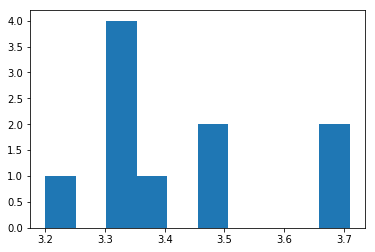

In [19]:
# Great, let's save the results and plot them
means = []
for experiment in range(10):
  results = roll_dice()
  means.append(mean(results))
  
from matplotlib.pyplot import hist
histogram1 = hist(means)

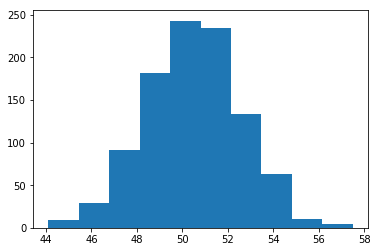

In [20]:
# Nice but doesn't really look like anything
# What if we have bigger dice, more rolls, and more experiments?

more_means = []
for experiment in range(1000):
  results = roll_dice(100, 200)
  more_means.append(mean(results))

histogram2 = hist(more_means)

## Central Limit Theorem

What we've just done is empirically verified the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). A full proof is non-trivial, but the motivation is "this is why we care about the normal distribution."

Specifically, the central limit theorem says that, when you add up and normalize independent random variables (such as a bunch of dice rolls), their sum tends towards a normal distribution.

Take a second to think about how remarkable this is - it says that, *regardless of the original/underlying distribution*, if you sum and normalize independent random variables, *eventually it looks like a normal distribution.*

That's pretty cool - and it's also super important for dealing with real data, since you often don't know the "true" distribution behind it. It serves as the foundation of hypothesis testing - something you'll learn more about tomorrow!

# Sampling

![alt text](https://upload.wikimedia.org/wikipedia/commons/b/bf/Simple_random_sampling.PNG)

As described earlier, one reason we need statistics is because we'd like to make statements about a general population based only on a subset - a *sample* - of the data. This can be for practical reasons, to reduce costs, or can be inherently necessary because of the nature of the problem. For example, it's not possible to collect data on "everyone who ever had a headache", so people wanting to study headaches will have to somehow get a group of people and try to generalize based on that.

What's the right way to build that group? If a drug company decides to only ask its employees if their headache drug works, does that have any problems?

*Yes* - let's discuss!

In [21]:
help(random.sample)

Help on method sample in module random:

sample(population, k) method of random.Random instance
    Chooses k unique random elements from a population sequence or set.
    
    Returns a new list containing elements from the population while
    leaving the original population unchanged.  The resulting list is
    in selection order so that all sub-slices will also be valid random
    samples.  This allows raffle winners (the sample) to be partitioned
    into grand prize and second place winners (the subslices).
    
    Members of the population need not be hashable or unique.  If the
    population contains repeats, then each occurrence is a possible
    selection in the sample.
    
    To choose a sample in a range of integers, use range as an argument.
    This is especially fast and space efficient for sampling from a
    large population:   sample(range(10000000), 60)



In [22]:
population = range(100)
sample = random.sample(population, 10)
print(sample)

[63, 49, 58, 23, 16, 73, 42, 79, 91, 25]


In general - a sampling process is good if your collected observations are *independent* and *identically distributed* - this property is called [IID](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) and there's plenty of math proofs about it, but the intuition is fairly straightforward:

- Independent: the likelihood of any particular observation being included in your sample isn't influenced by the inclusion or exclusion of any other particular observation
- Identically distributed: all observations in your sample are generated by the same underlying probability distribution as the population

You may be wondering - how big does my sample need to be? Good question! We won't go into it now, but this too is a question that hypothesis testing can help us answer.

# More statistics!

This is just an introduction - there's plenty more to know about statistics. As a data scientist it is worth going fairly deep, though you don't have to write proofs or get a PhD - a lot of this knowledge is best gained through experience, and it's totally okay to do things like Monte Carlo simulations to get a feel for how a statistics concept works.

Here are some suggested resources and ways to keep building experience with statistics:

- [Summary of random variables](http://www.stat.yale.edu/Courses/1997-98/101/ranvar.htm)
- [Online statistics and probability course that covers variables and distributions](https://onlinecourses.science.psu.edu/stat414/node/48/)
- [Interesting story about the life of Kolmogorov, a famous statistician](http://nautil.us/issue/4/the-unlikely/the-man-who-invented-modern-probability)

![Correlation doesn't imply causation, but it does waggle its eyebrows suggestively and gesture furtively while mouthing 'look over there'.](https://imgs.xkcd.com/comics/correlation.png)